In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split

import xgboost as xgb

**Подготовим датасет для предсказаний, не будем изобретать велосипед xgboost шикарен для табличек**

In [2]:
def zscore(data_col):
  zsc_norm_col = (data_col - data_col.mean()) / data_col.std()
  return zsc_norm_col

In [4]:
def rmse(pred_val, true_val):
  return np.sqrt(sum((pred_val - true_val)**2)/len(pred_val))

In [8]:
deliv_df = pd.read_csv('/content/dataset_for_predictions.csv').drop(["Unnamed: 0"], axis = 1)
deliv_df = deliv_df.drop(["FORECAST_DATE"], axis = 1)

target = deliv_df["courier_num"]
features = deliv_df.drop(["courier_num"], axis = 1)

In [15]:
features

,num_of_orders,entropy
0,0.469802,0.583497
1,-1.278932,-1.254963
2,-1.192990,-1.054497
3,-0.363462,0.394863
4,2.386684,1.269603
...,...,...
117,0.294182,0.333014
118,0.462329,0.818550
119,-1.084628,-0.972445
120,-1.103311,-0.865185


In [16]:
for col in features.columns:
  features[col] = zscore(features[col])

In [17]:
features

,num_of_orders,entropy
0,0.469802,0.583497
1,-1.278932,-1.254963
2,-1.192990,-1.054497
3,-0.363462,0.394863
4,2.386684,1.269603
...,...,...
117,0.294182,0.333014
118,0.462329,0.818550
119,-1.084628,-0.972445
120,-1.103311,-0.865185


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=6, shuffle = True)

clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

clf.score(X_test, y_test)


0.8537999334262684

**В среднем мы ошибаемся на 1.7 курьера в день, что вполне терпимо**

In [14]:
rmse(predictions, y_test)

1.6904647965662387

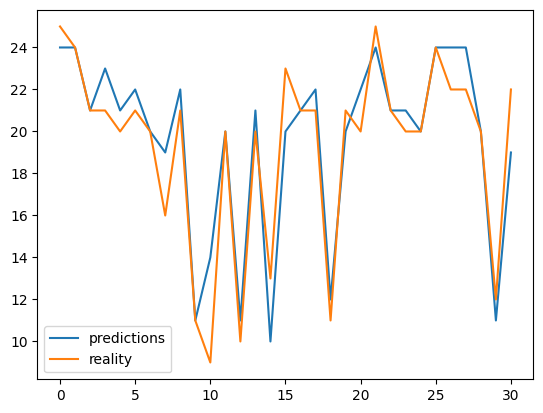

In [ ]:
plt.plot(np.ceil(predictions), label = "predictions")
plt.plot(list(y_test), label = "reality")
plt.legend()

**Посмотрим силу предикторов по information gain**


In [ ]:
clf.get_booster().get_score(importance_type='gain')

{'num_of_orders': 2.5933899879455566, 'entropy': 1.1194266080856323}